In [170]:
import os

In [171]:
os.environ['OMP_NUM_THREADS'] = '1'

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [173]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [174]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [175]:
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [177]:
df.isnull().sum().sort_values(ascending = False)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [178]:
gender_mapping = {'Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].map(gender_mapping)

In [179]:
print(df['Gender'].dtype)
print(df.head())

int64
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [181]:
from sklearn.cluster import AgglomerativeClustering

In [182]:
# Define X using the features you want to use for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
y_agg = agg_clustering.fit_predict(X)

# Print the cluster labels
print("Cluster labels:", y_agg)


Cluster labels: [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [183]:
# Add the cluster labels to the DataFrame
df['Cluster'] = y_agg

# Display the DataFrame with cluster labels
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster  
0        4  
1        3  
2        4  
3        3  
4        4  


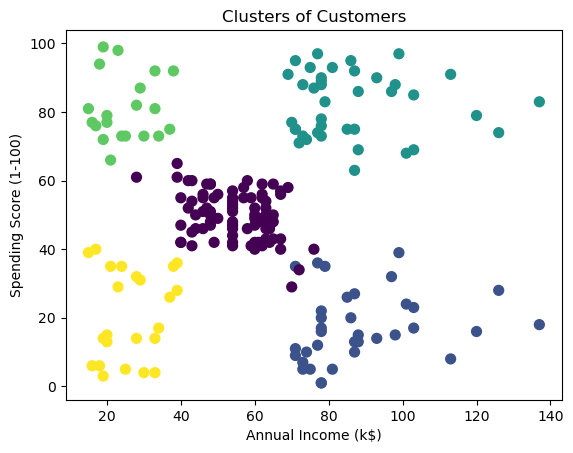

In [184]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_agg, s=50, cmap='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [186]:
# Calculate cluster centers
cluster_centers = df.groupby('Cluster').mean()


In [187]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [188]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
y_agg = agg_clustering.fit_predict(X)

In [189]:
df['Cluster'] = y_agg

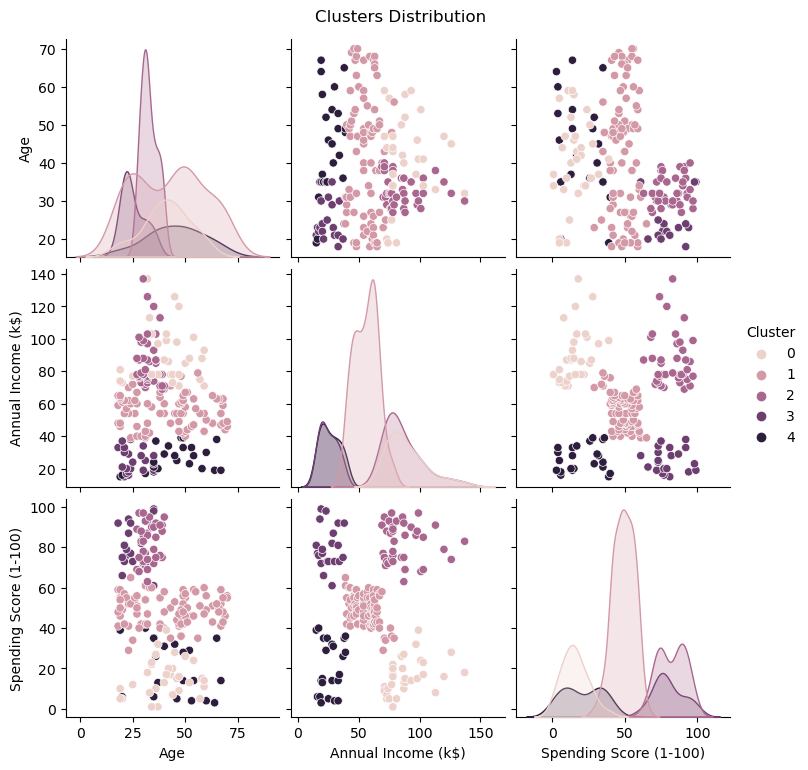

In [190]:
import warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Create the pairplot
pairplot = sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Set the title for the whole plot
pairplot.fig.suptitle('Clusters Distribution', y=1.02)  # y=1.02 to give some space to the title

plt.show()


In [192]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0        166.250000  0.562500  41.000000           89.406250   
1         87.894118  0.400000  42.482353           55.811765   
2        162.000000  0.461538  32.692308           86.538462   
3         22.000000  0.428571  25.333333           25.095238   
4         23.000000  0.391304  45.217391           26.304348   

         Spending Score (1-100)  
Cluster                          
0                     15.593750  
1                     49.129412  
2                     82.128205  
3                     80.047619  
4                     20.913043  


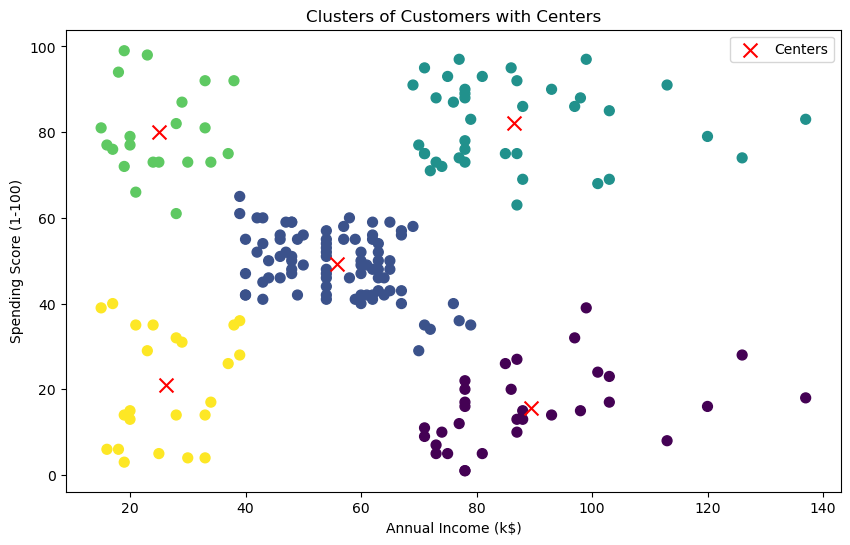

In [193]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], s=50, cmap='viridis')
plt.scatter(cluster_summary['Annual Income (k$)'], cluster_summary['Spending Score (1-100)'], 
           marker='x', c='red', s=100, label='Centers')
plt.title('Clusters of Customers with Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

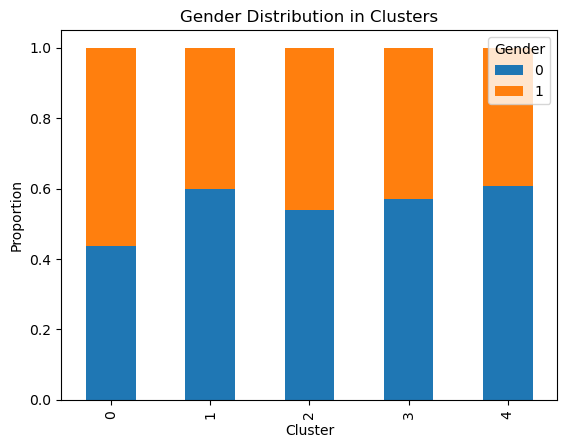

In [194]:
gender_dist = df.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack()
gender_dist.plot(kind='bar', stacked=True)
plt.title('Gender Distribution in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.show()

In [195]:
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

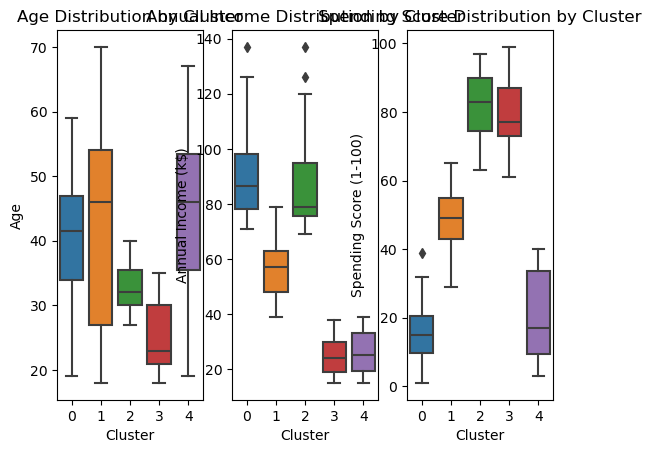

In [196]:
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution by Cluster')

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Annual Income Distribution by Cluster')

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution by Cluster')

plt.show()

Cluster
0    32
1    85
2    39
3    21
4    23
Name: count, dtype: int64


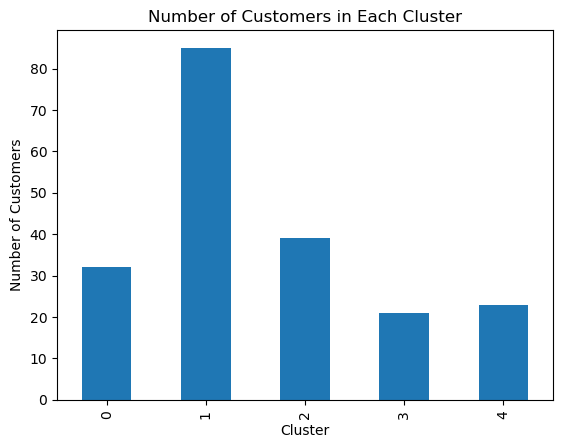

In [197]:
# Cluster Count
cluster_counts = df['Cluster'].value_counts().sort_index()
print(cluster_counts)
cluster_counts.plot(kind='bar')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [198]:
# Cluster Profiles
cluster_profiles = df.groupby('Cluster').agg({
    'Age': ['mean', 'median'],
    'Annual Income (k$)': ['mean', 'median'],
    'Spending Score (1-100)': ['mean', 'median'],
    'Gender': lambda x: x.mode()[0]
})
print(cluster_profiles)

               Age        Annual Income (k$)        Spending Score (1-100)  \
              mean median               mean median                   mean   
Cluster                                                                      
0        41.000000   41.5          89.406250   86.5              15.593750   
1        42.482353   46.0          55.811765   57.0              49.129412   
2        32.692308   32.0          86.538462   79.0              82.128205   
3        25.333333   23.0          25.095238   24.0              80.047619   
4        45.217391   46.0          26.304348   25.0              20.913043   

                 Gender  
        median <lambda>  
Cluster                  
0         15.0        1  
1         49.0        0  
2         83.0        0  
3         77.0        0  
4         17.0        0  


In [199]:
# Visualize the cluster profiles
cluster_profiles.columns = ['_'.join(col) for col in cluster_profiles.columns]

In [200]:
# Plotting the mean values
cluster_profiles_means = cluster_profiles[['Age_mean', 'Annual Income (k$)_mean', 'Spending Score (1-100)_mean']]

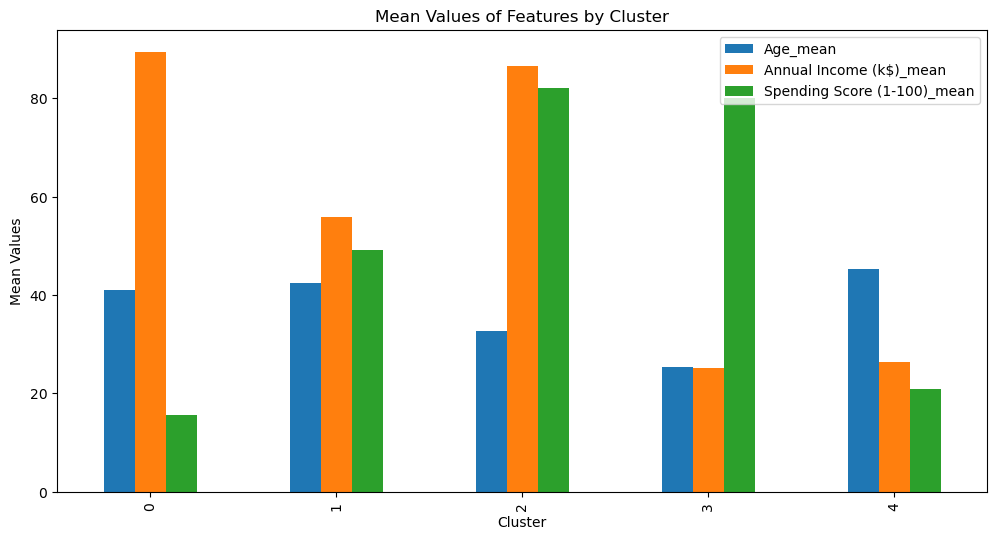

In [201]:
cluster_profiles_means.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Values of Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Values')
plt.legend(loc='best')
plt.show()

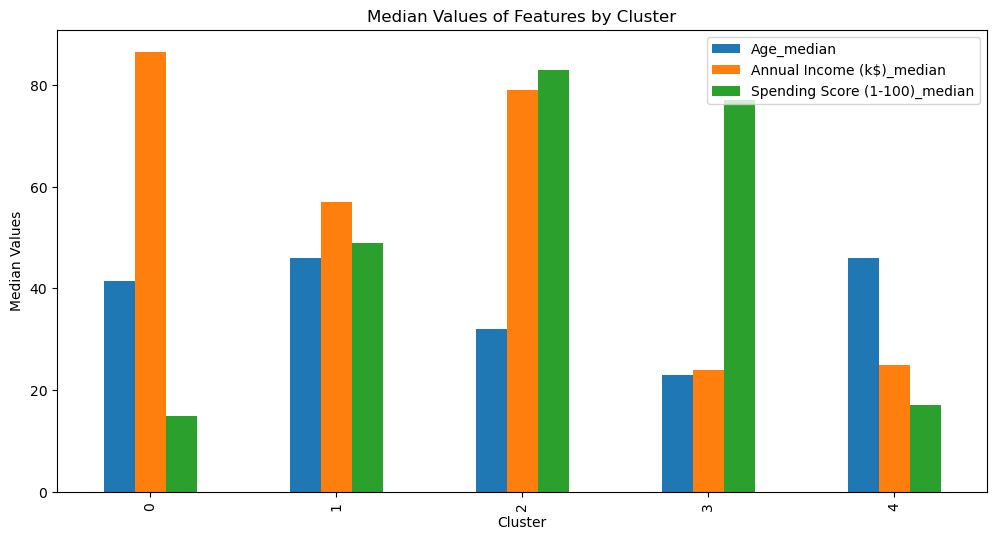

In [202]:
# Plotting the median values
cluster_profiles_medians = cluster_profiles[['Age_median', 'Annual Income (k$)_median', 'Spending Score (1-100)_median']]

cluster_profiles_medians.plot(kind='bar', figsize=(12, 6))
plt.title('Median Values of Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Values')
plt.legend(loc='best')
plt.show()

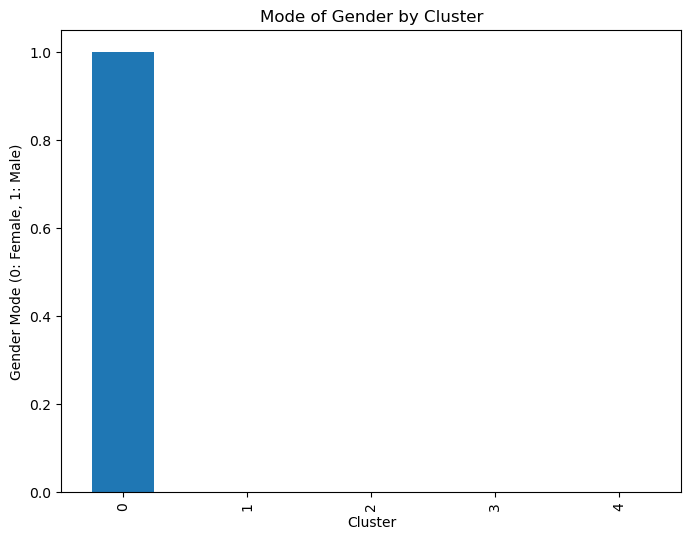

In [203]:
# Plotting gender mode
gender_modes = df.groupby('Cluster')['Gender'].agg(lambda x: x.mode()[0])

gender_modes.plot(kind='bar', figsize=(8, 6))
plt.title('Mode of Gender by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Gender Mode (0: Female, 1: Male)')
plt.show()

In [204]:
# Summarizing key findings
summary = []

for cluster, profile in cluster_profiles.iterrows():
    age_mean = profile['Age_mean']
    income_mean = profile['Annual Income (k$)_mean']
    spending_mean = profile['Spending Score (1-100)_mean']
    gender_mode = profile['Gender_<lambda>']
    gender_str = 'Male' if gender_mode == 1 else 'Female'
    
    summary.append(f"Cluster {cluster}:")
    summary.append(f"  - Average Age: {age_mean:.2f}")
    summary.append(f"  - Average Annual Income: {income_mean:.2f}k$")
    summary.append(f"  - Average Spending Score: {spending_mean:.2f}")
    summary.append(f"  - Predominant Gender: {gender_str}")
    summary.append("")

# Print the summary
print("\n".join(summary))

Cluster 0:
  - Average Age: 41.00
  - Average Annual Income: 89.41k$
  - Average Spending Score: 15.59
  - Predominant Gender: Male

Cluster 1:
  - Average Age: 42.48
  - Average Annual Income: 55.81k$
  - Average Spending Score: 49.13
  - Predominant Gender: Female

Cluster 2:
  - Average Age: 32.69
  - Average Annual Income: 86.54k$
  - Average Spending Score: 82.13
  - Predominant Gender: Female

Cluster 3:
  - Average Age: 25.33
  - Average Annual Income: 25.10k$
  - Average Spending Score: 80.05
  - Predominant Gender: Female

Cluster 4:
  - Average Age: 45.22
  - Average Annual Income: 26.30k$
  - Average Spending Score: 20.91
  - Predominant Gender: Female



In [205]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [206]:
# Map gender to strings for easier interpretation
gender_mapping = {1: 'Male', 0: 'Female'}
df['Gender'] = df['Gender'].map(gender_mapping).astype(str)


In [207]:
# Create a transactional-like dataset
df['Age'] = 'Age_' + df['Age'].astype(str)
df['Annual Income (k$)'] = 'Income_' + df['Annual Income (k$)'].astype(str)
df['Spending Score (1-100)'] = 'Score_' + df['Spending Score (1-100)'].astype(str)


In [208]:
# Combine all the features into a list of items for each customer
transactions = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values.tolist()

# Print the first few transactions
print(transactions[:5])


[['Male', 'Age_19', 'Income_15', 'Score_39'], ['Male', 'Age_21', 'Income_15', 'Score_81'], ['Female', 'Age_20', 'Income_16', 'Score_6'], ['Female', 'Age_23', 'Income_16', 'Score_77'], ['Female', 'Age_31', 'Income_17', 'Score_40']]


In [209]:
# Encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [210]:
# Print the encoded DataFrame
print(df_encoded.head())


   Age_18  Age_19  Age_20  Age_21  Age_22  Age_23  Age_24  Age_25  Age_26  \
0   False    True   False   False   False   False   False   False   False   
1   False   False   False    True   False   False   False   False   False   
2   False   False    True   False   False   False   False   False   False   
3   False   False   False   False   False    True   False   False   False   
4   False   False   False   False   False   False   False   False   False   

   Age_27  ...  Score_9  Score_90  Score_91  Score_92  Score_93  Score_94  \
0   False  ...    False     False     False     False     False     False   
1   False  ...    False     False     False     False     False     False   
2   False  ...    False     False     False     False     False     False   
3   False  ...    False     False     False     False     False     False   
4   False  ...    False     False     False     False     False     False   

   Score_95  Score_97  Score_98  Score_99  
0     False     False     Fals

In [214]:
# Generate frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
print(frequent_itemsets.head())


   support     itemsets
0    0.055     (Age_32)
1    0.560     (Female)
2    0.060  (Income_54)
3    0.060  (Income_78)
4    0.440       (Male)


In [215]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules.head())

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


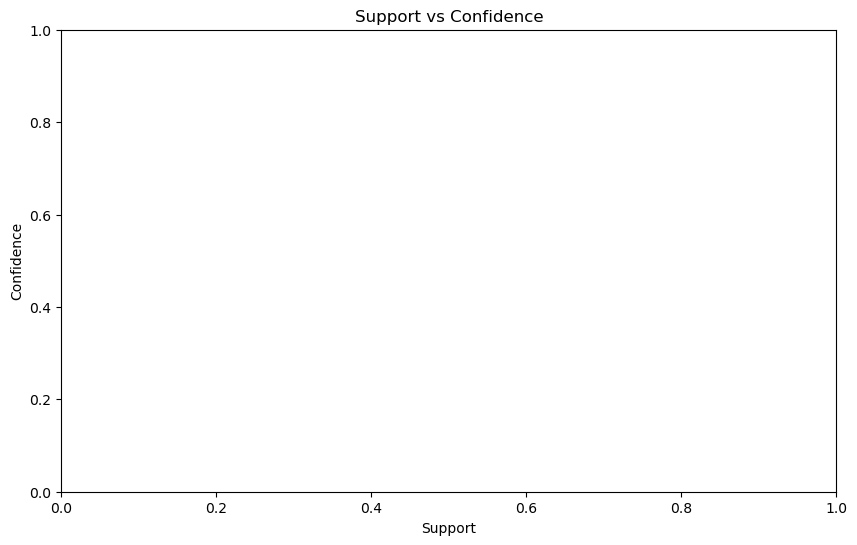

In [216]:
# Visualize the support, confidence, and lift
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False, sizes=(20, 2000))
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [217]:
# Check the data type of the 'consequents' column
print(top_rules['consequents'].dtype)

# If the data type is not object or category, convert it to strings
top_rules['consequents'] = top_rules['consequents'].astype(str)


object


In [218]:
# Check the data types of the 'lift' and 'consequents' columns
print(top_rules['lift'].dtype)
print(top_rules['consequents'].dtype)


int64
object


In [219]:
print(top_rules['consequents'].head())

Series([], Name: consequents, dtype: object)


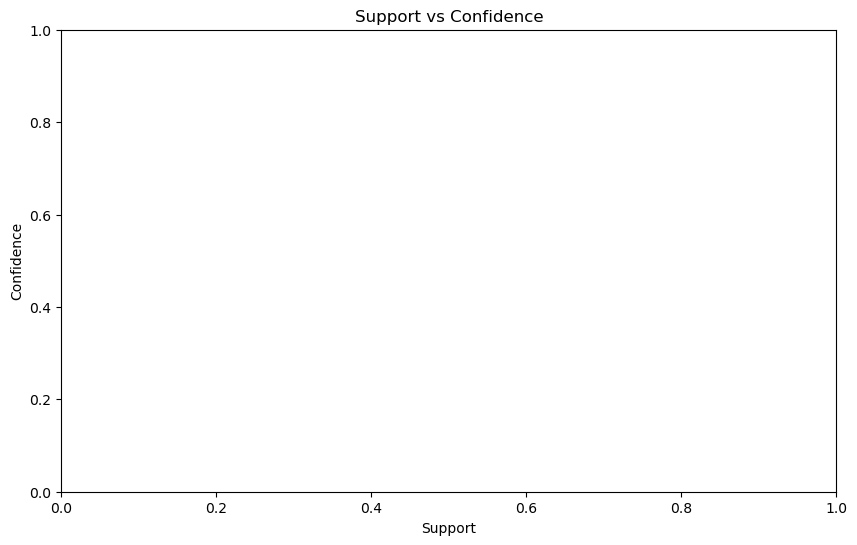

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [220]:
# Visualize the support, confidence, and lift
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False, sizes=(20, 2000))
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Print the first few rows of the rules DataFrame for debugging
print(rules.head())

In [221]:
# Check for categorical variables
categorical_columns = df.select_dtypes(include=['category']).columns

# If there are categorical variables, convert them to the appropriate type
for col in categorical_columns:
    df[col] = df[col].astype('category')


In [222]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

  antecedents consequents  antecedent support  consequent support  support  \
0    (Age_18)      (Male)                0.02               0.440    0.015   
1      (Male)    (Age_18)                0.44               0.020    0.015   
2    (Age_19)      (Male)                0.04               0.440    0.030   
3      (Male)    (Age_19)                0.44               0.040    0.030   
4      (Male)    (Age_20)                0.44               0.025    0.015   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.750000  1.704545    0.0062    2.240000       0.421769  
1    0.034091  1.704545    0.0062    1.014588       0.738095  
2    0.750000  1.704545    0.0124    2.240000       0.430556  
3    0.068182  1.704545    0.0124    1.030244       0.738095  
4    0.034091  1.363636    0.0040    1.009412       0.476190  


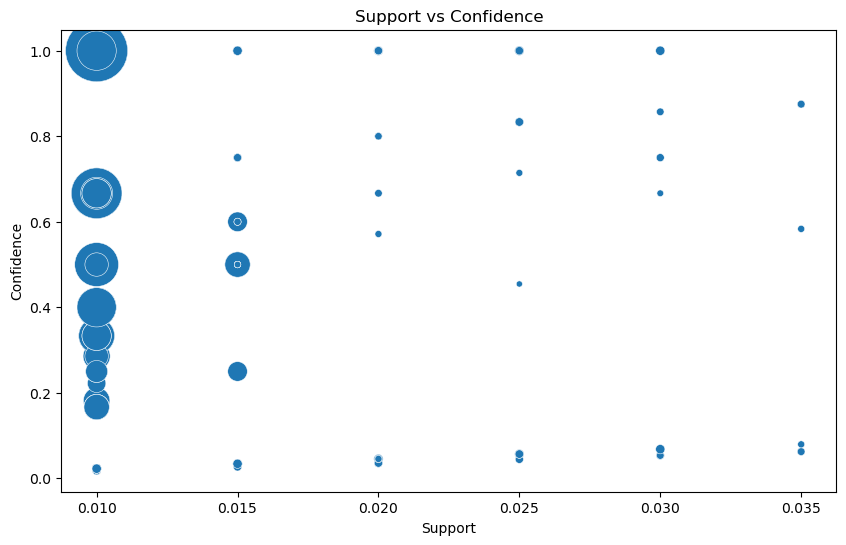

In [223]:
# Generate frequent itemsets with a lower minimum support threshold
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Check if rules were generated
print(rules.head())

# Visualize the support, confidence, and lift
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False, sizes=(20, 2000))
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


In [224]:
print(rules.head())


  antecedents consequents  antecedent support  consequent support  support  \
0    (Age_18)      (Male)                0.02               0.440    0.015   
1      (Male)    (Age_18)                0.44               0.020    0.015   
2    (Age_19)      (Male)                0.04               0.440    0.030   
3      (Male)    (Age_19)                0.44               0.040    0.030   
4      (Male)    (Age_20)                0.44               0.025    0.015   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.750000  1.704545    0.0062    2.240000       0.421769  
1    0.034091  1.704545    0.0062    1.014588       0.738095  
2    0.750000  1.704545    0.0124    2.240000       0.430556  
3    0.068182  1.704545    0.0124    1.030244       0.738095  
4    0.034091  1.363636    0.0040    1.009412       0.476190  


In [225]:
# Define the threshold value
threshold = 0.05

# Filter rules with high support
high_support_rules = rules[rules['support'] > threshold]


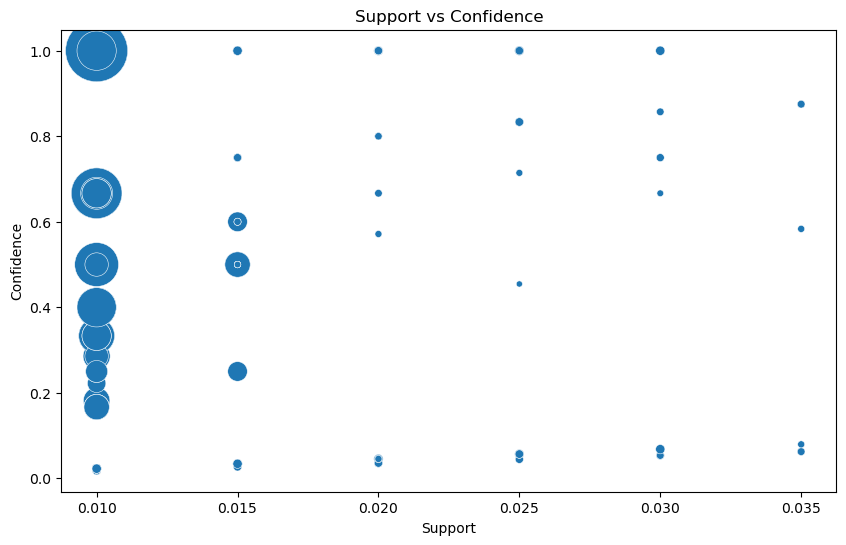

In [226]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False, sizes=(20, 2000))
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


In [227]:
# Define the value of n
n = 10

# Get the top rules based on support, confidence, and lift
top_support_rules = rules.sort_values(by='support', ascending=False).head(n)
top_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(n)
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(n)


Top Support Rules:
      antecedents  consequents  antecedent support  consequent support  \
223       (Male)  (Income_54)                0.44               0.060   
35      (Female)     (Age_31)                0.56               0.040   
148  (Income_78)     (Female)                0.06               0.560   
149     (Female)  (Income_78)                0.56               0.060   
166   (Score_42)     (Female)                0.04               0.560   
167     (Female)   (Score_42)                0.56               0.040   
34      (Age_31)     (Female)                0.04               0.560   
222  (Income_54)       (Male)                0.06               0.440   
81      (Female)     (Age_49)                0.56               0.035   
47      (Female)     (Age_35)                0.56               0.045   

     support  confidence      lift  leverage  conviction  zhangs_metric  
223    0.035    0.079545  1.325758    0.0086    1.021235       0.438776  
35     0.035    0.062500  1.

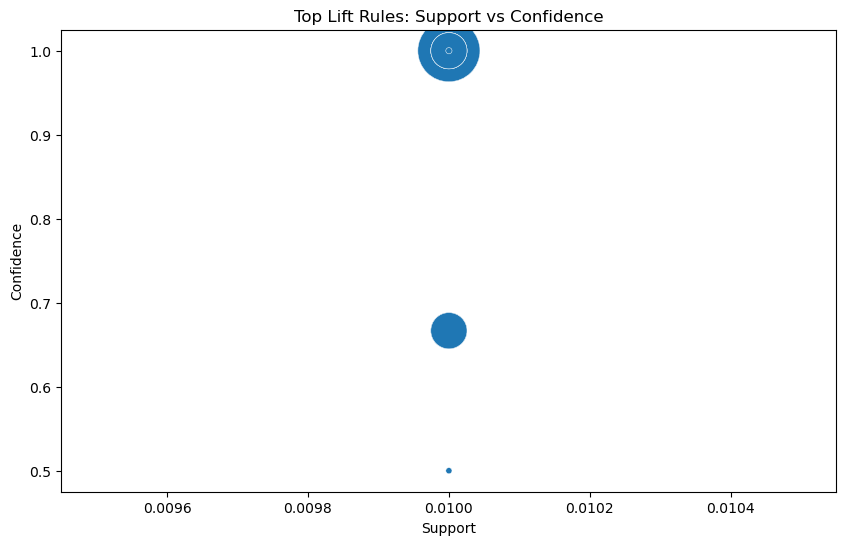

In [228]:
# Filter rules based on support threshold
threshold = 0.05
high_support_rules = rules[rules['support'] > threshold]

# Sort rules based on different metrics and select top n rules
n = 10  # Number of top rules to select
top_support_rules = rules.sort_values(by='support', ascending=False).head(n)
top_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(n)
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(n)

# Further analysis or visualization of top rules
# For example:
# 1. Print top rules
print("Top Support Rules:\n", top_support_rules)
print("\nTop Confidence Rules:\n", top_confidence_rules)
print("\nTop Lift Rules:\n", top_lift_rules)

# 2. Visualize rule metrics
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=top_lift_rules, legend=False, sizes=(20, 2000))
plt.title('Top Lift Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


High Support Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

Top Support Rules:
                                 antecedents  \
223                                   (Male)   
35                                  (Female)   
148  (Income_Income_Income_Income_Income_78)   
149                                 (Female)   
166       (Score_Score_Score_Score_Score_42)   
167                                 (Female)   
34                  (Age_Age_Age_Age_Age_31)   
222  (Income_Income_Income_Income_Income_54)   
81                                  (Female)   
47                  (Age_Age_Age_Age_Age_35)   

                                 consequents  antecedent support  \
223  (Income_Income_Income_Income_Income_54)               0.440   
35                  (Age_Age_Age_Age_Age_31)               0.560   
148                                 (Female)               0.

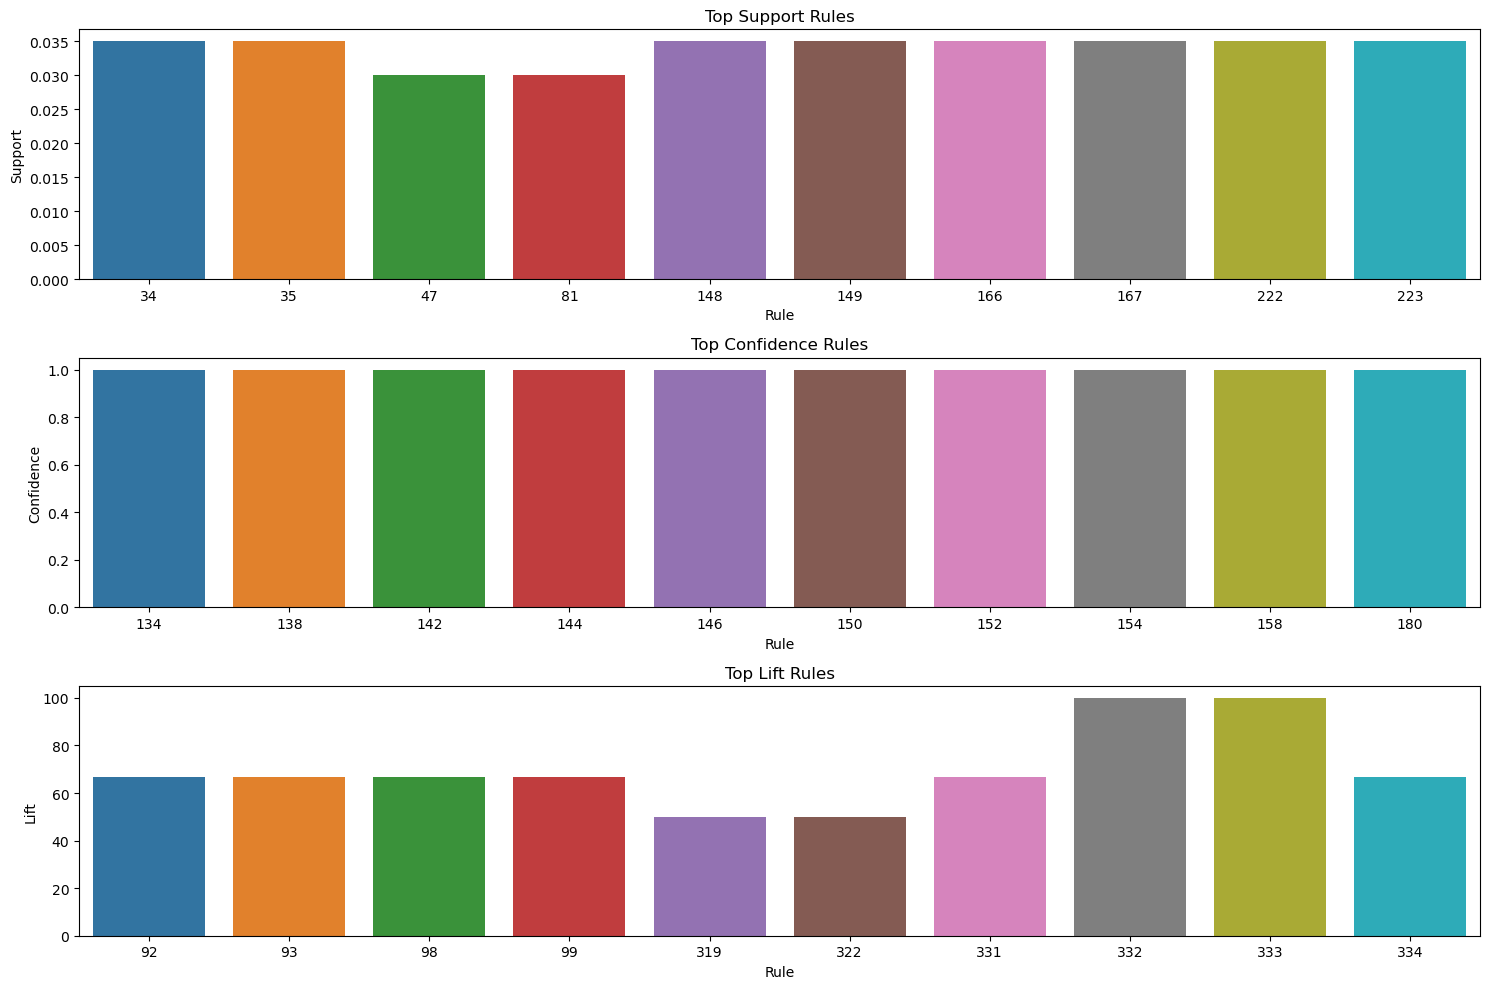

In [147]:
# Define a threshold for support and the number of top rules to consider
threshold = 0.05
n = 10

# Filter rules with high support
high_support_rules = rules[rules['support'] > threshold]

# Get the top rules based on support, confidence, and lift
top_support_rules = rules.sort_values(by='support', ascending=False).head(n)
top_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(n)
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(n)

# Perform further analysis or visualization on the filtered or top rules
# For example, you can print or visualize these rules
print("High Support Rules:")
print(high_support_rules)

print("\nTop Support Rules:")
print(top_support_rules)

print("\nTop Confidence Rules:")
print(top_confidence_rules)

print("\nTop Lift Rules:")
print(top_lift_rules)

# You can also visualize the support, confidence, and lift of the top rules
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.barplot(x=top_support_rules.index, y=top_support_rules['support'])
plt.title('Top Support Rules')
plt.xlabel('Rule')
plt.ylabel('Support')

plt.subplot(3, 1, 2)
sns.barplot(x=top_confidence_rules.index, y=top_confidence_rules['confidence'])
plt.title('Top Confidence Rules')
plt.xlabel('Rule')
plt.ylabel('Confidence')

plt.subplot(3, 1, 3)
sns.barplot(x=top_lift_rules.index, y=top_lift_rules['lift'])
plt.title('Top Lift Rules')
plt.xlabel('Rule')
plt.ylabel('Lift')

plt.tight_layout()
plt.show()
